## Setup

In [1]:
from collections import OrderedDict
from enum import Enum

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import torch
import numpy as np

In [3]:
from curlyBrace import curlyBrace

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [5]:
# Formatting & autoreload stuff
%load_ext lab_black
%load_ext autoreload
%autoreload 2
# %matplotlib ipympl

## Activity heatmap

In [6]:
loc_rand = torch.randn((34, 34)) * 0.2
loc_rand.shape

torch.Size([34, 34])

In [7]:
# loc_rand2 = torch.randn((34, 34)) * 0.2
# loc_rand2.shape

In [8]:
blocs = torch.block_diag(
    torch.ones((4, 4)),
    torch.ones((6, 6)),
    torch.ones((4, 4)),
    torch.ones((6, 6)),
    torch.ones((5, 5)),
    torch.ones((2, 2)),
    torch.ones((7, 7)),
)
blocs.shape

torch.Size([34, 34])

In [9]:
# blocs2 = torch.block_diag(
#     torch.ones((6, 6)),
#     torch.ones((4, 4)),
#     torch.ones((5, 5)),
#     torch.ones((3, 3)),
#     torch.ones((7, 7)),
# )
# blocs2.shape

In [10]:
loc = blocs + loc_rand

In [11]:
# loc2 = blocs2 + loc_rand2

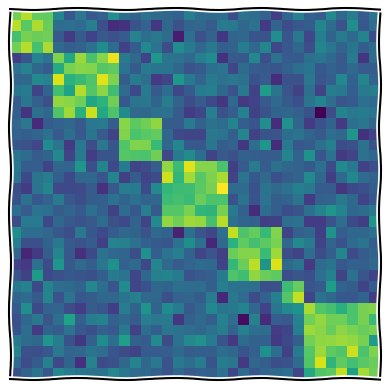

In [12]:
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.matshow(loc)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [13]:
odor_diag = torch.zeros(3, 3)
odor_diag.fill_diagonal_(1)
odor_diag

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [14]:
# odor_rand = torch.randn((3, 3)) * 0.2
odor_rand = torch.zeros((3, 3))
odor_rand

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [15]:
odor = odor_diag + odor_rand
odor

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

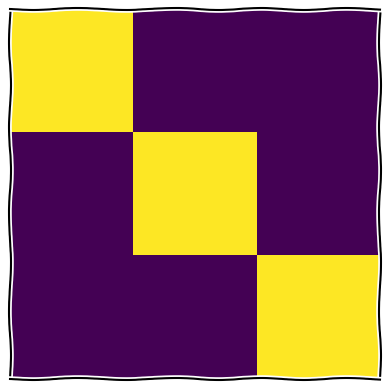

In [16]:
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.matshow(odor)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [17]:
odor_loc = torch.randn((34, 3))
odor_loc.T

tensor([[ 0.3585, -1.8374,  0.5097, -0.1403, -2.3052,  0.2629, -0.5211,  2.2355,
          0.5627, -0.4461, -0.7743, -0.2886, -1.2650,  1.1692, -1.2090, -0.0751,
         -0.3330,  1.0018,  1.6945, -1.1984,  0.5333, -1.5000,  0.7707,  0.7349,
          0.7995, -0.1242,  0.5919, -0.0773,  0.9916,  0.4375,  0.1855,  0.2640,
         -0.3510,  0.8687],
        [ 2.0001, -0.4070, -0.9922,  1.3406, -2.0451,  0.0311, -1.3957, -0.1052,
          0.6854,  1.5177, -1.6950,  0.3357,  0.9890,  0.8277,  0.4035, -1.1641,
          0.7160,  1.1392, -1.4684, -1.4986, -1.5099,  0.5921,  0.6870,  0.1068,
          1.0113, -1.2284, -1.3492,  1.6906, -1.0546, -1.0431,  0.8414,  1.0905,
          0.2535,  1.6075],
        [-0.0253,  1.5366,  2.1462,  2.4008, -1.4063,  1.8449,  0.8077, -0.9333,
          0.6712,  0.5447, -0.0123, -0.2178,  0.2766,  0.3359, -0.9040, -0.3602,
         -0.5715,  0.9833,  1.6685, -0.3013, -1.1382, -0.4172, -0.4258,  0.7753,
         -0.6858, -0.0587,  0.8362,  1.5850, -0.2490,

In [18]:
# odor_loc2 = torch.randn((25, 3))

In [19]:
tmp_mat1 = torch.cat((loc, odor_loc), dim=1)
tmp_mat1.shape

torch.Size([34, 37])

In [20]:
tmp_mat2 = torch.cat((odor_loc.T, odor), dim=1)
tmp_mat2.shape

torch.Size([3, 37])

In [21]:
neural = torch.cat((tmp_mat1, tmp_mat2), dim=0)
neural.shape

torch.Size([37, 37])

In [22]:
# simu = torch.cat(
#     (torch.cat((loc2, odor_loc2), dim=1), torch.cat((odor_loc2.T, odor), dim=1)), dim=0
# )
# simu.shape

In [23]:
braces = []
braces.append(
    {
        "p1": [-2, 0],
        "p2": [-2, 19],
        "str_text": "cartesian",
    }
)
braces.append(
    {
        "p1": [-2, 20],
        "p2": [-2, 34],
        "str_text": "polar",
    }
)
braces.append(
    {
        "p1": [-2, 34],
        "p2": [-2, 36],
        "str_text": "odor",
    }
)
# braces.append(
#     {
#         "p1": [0, -2],
#         "p2": [24, -2],
#         "str_text": "location",
#     }
# )
# braces.append(
#     {
#         "p1": [25, -2],
#         "p2": [27, -2],
#         "str_text": "odor",
#     }
# )

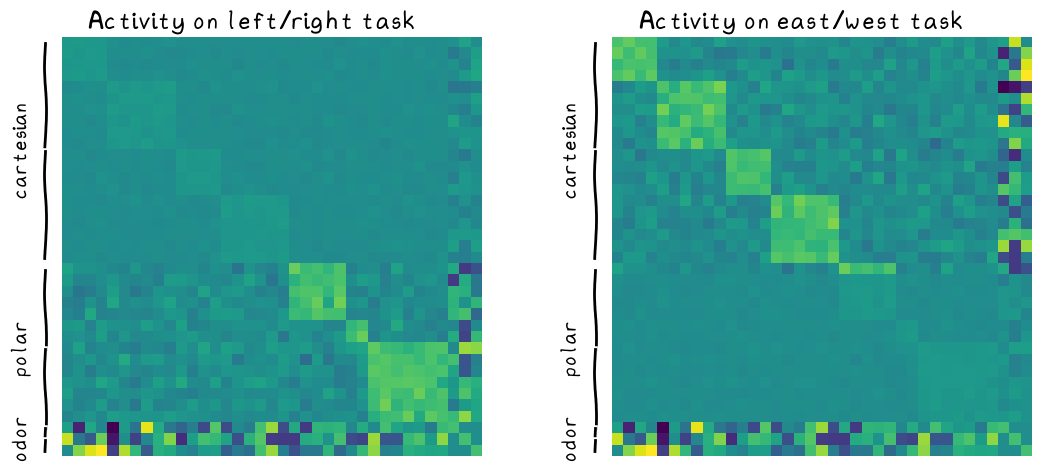

In [24]:
with plt.xkcd():
    neural[0:20, :] = neural[0:20, :] / 5

    fig, ax = plt.subplots(1, 2, figsize=(13, 8))
    ax[0].matshow(neural)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    # ax.set_xlabel('time')
    # ax.set_xlabel("Neural data", fontsize=30)
    ax[0].set_title("Activity on left/right task")
    neural[0:20, :] = neural[0:20, :] * 5
    neural[21:34, :] = neural[21:34, :] / 5
    ax[1].matshow(neural)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_title("Activity on east/west task")

    for axi in ax:
        for spine in axi.spines.values():
            spine.set_visible(False)

        for idx, brace in enumerate(braces):
            curlyBrace(
                fig=fig,
                ax=axi,
                p1=brace["p1"],
                p2=brace["p2"],
                k_r=0.0,
                bool_auto=False,
                str_text=brace["str_text"],
                color="black",
                lw=2,
                int_line_num=2,
            )
    fig.patch.set_alpha(0)
    fig.patch.set_facecolor("white")

    plt.show()

## Box plot

In [25]:
agents_pop_num = 10
tmp = ["no translation" for _ in range(agents_pop_num)]
tmp.extend(["cartesian\ntranslated" for _ in range(agents_pop_num)])
tmp.extend(["polar\ntranslated" for _ in range(agents_pop_num)])
df_transl = pd.DataFrame(
    {
        "task_solved": np.concatenate(
            [
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
            ]
        ),
        "translated_experiment": tmp,
    }
)
df_transl

,task_solved,translated_experiment
0,0.837746,no translation
1,0.843204,no translation
2,0.859640,no translation
3,0.811341,no translation
4,0.868476,no translation
5,0.990400,no translation
6,0.816815,no translation
7,0.819346,no translation
8,0.803435,no translation
9,0.846603,no translation


In [26]:
tmp = ["left/right\ncorrect\nangle" for _ in range(agents_pop_num)]
tmp.extend(["left/right\nincorrect\nangle" for _ in range(agents_pop_num)])
tmp.extend(["east/west\ncorrect\nangle" for _ in range(agents_pop_num)])
tmp.extend(["east/west\nincorrect\nangle" for _ in range(agents_pop_num)])
df_wrong_angle = pd.DataFrame(
    {
        "task_solved": np.concatenate(
            [
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
                np.random.uniform(low=0.0, high=0.2, size=agents_pop_num),
            ]
        ),
        "incorrect_angle_experiment": tmp,
    }
)
df_wrong_angle

,task_solved,incorrect_angle_experiment
0,0.862338,left/right\ncorrect\nangle
1,0.929325,left/right\ncorrect\nangle
2,0.982401,left/right\ncorrect\nangle
3,0.826913,left/right\ncorrect\nangle
4,0.956792,left/right\ncorrect\nangle
5,0.910848,left/right\ncorrect\nangle
6,0.961278,left/right\ncorrect\nangle
7,0.819901,left/right\ncorrect\nangle
8,0.874952,left/right\ncorrect\nangle
9,0.934482,left/right\ncorrect\nangle


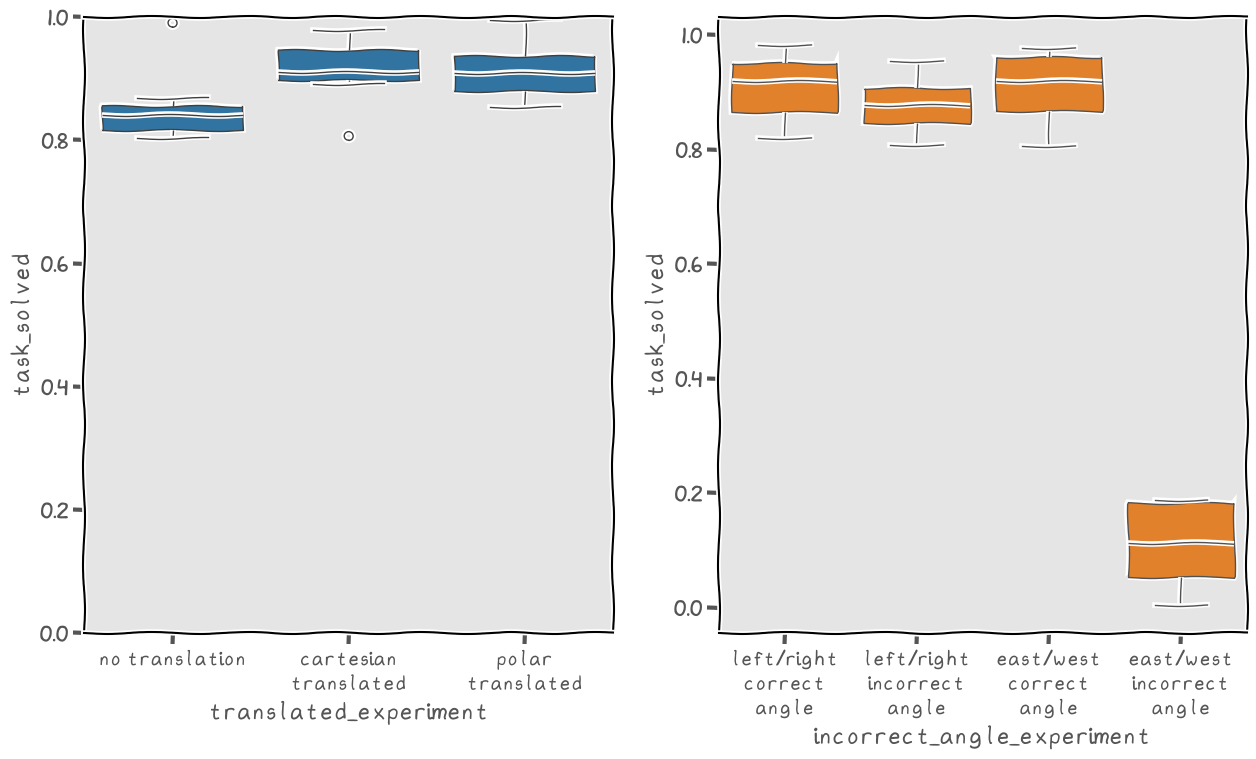

In [27]:
plt.style.use("ggplot")
with plt.xkcd():
    fig, ax = plt.subplots(1, 2, figsize=(15, 8))
    palette = sns.color_palette("tab10")

    sns.boxplot(
        data=df_transl,
        x="translated_experiment",
        y="task_solved",
        ax=ax[0],
        color=palette[0],
    )
    ax[0].set(ylim=(0, 1))

    sns.boxplot(
        data=df_wrong_angle,
        x="incorrect_angle_experiment",
        y="task_solved",
        ax=ax[1],
        color=palette[1],
    )

    fig.patch.set_alpha(0)
    fig.patch.set_facecolor("white")

    plt.show()

## Weights

In [28]:
class Cues(Enum):
    NoOdor = 0
    OdorA = 1
    OdorB = 2


CONTEXTS_LABELS = OrderedDict(
    [
        # (LightCues.North, "Pre odor - North light"),
        # (LightCues.South, "Pre odor - South light"),
        # (OdorID.A, "Post odor - Odor A"),
        # (OdorID.B, "Post odor - Odor B"),
        (Cues.NoOdor, "Pre odor"),
        (Cues.OdorA, "Odor A"),
        (Cues.OdorB, "Odor B"),
    ]
)
rows = 5
cols = 5
tiles_locations = torch.arange(rows * cols, device=device)

In [29]:
# Construct input dictionnary to be fed to the network
input_cond = OrderedDict({})
for cue_obj, cue_txt in CONTEXTS_LABELS.items():
    for loc in tiles_locations:
        current_state = torch.tensor([loc, cue_obj.value], device=device)
        input_cond[f"{loc}-{cue_txt}"] = current_state.float()
input_cond

OrderedDict([('0-Pre odor', tensor([0., 0.])),
             ('1-Pre odor', tensor([1., 0.])),
             ('2-Pre odor', tensor([2., 0.])),
             ('3-Pre odor', tensor([3., 0.])),
             ('4-Pre odor', tensor([4., 0.])),
             ('5-Pre odor', tensor([5., 0.])),
             ('6-Pre odor', tensor([6., 0.])),
             ('7-Pre odor', tensor([7., 0.])),
             ('8-Pre odor', tensor([8., 0.])),
             ('9-Pre odor', tensor([9., 0.])),
             ('10-Pre odor', tensor([10.,  0.])),
             ('11-Pre odor', tensor([11.,  0.])),
             ('12-Pre odor', tensor([12.,  0.])),
             ('13-Pre odor', tensor([13.,  0.])),
             ('14-Pre odor', tensor([14.,  0.])),
             ('15-Pre odor', tensor([15.,  0.])),
             ('16-Pre odor', tensor([16.,  0.])),
             ('17-Pre odor', tensor([17.,  0.])),
             ('18-Pre odor', tensor([18.,  0.])),
             ('19-Pre odor', tensor([19.,  0.])),
             ('20-Pre odor', t

In [30]:
# Get the number of neurons in the layer inspected
neurons_num = 100

# Get the activations from the network
# activations_layer = (
#     torch.ones((len(input_cond), neurons_num), device=DEVICE) * torch.nan
# )
# for idx, (cond, input_val) in enumerate(input_cond.items()):
#     activations_layer[idx, :] = torch.randn((1, neurons_num))
activations_layer = torch.randn((len(input_cond), neurons_num), device=device) / 5

In [31]:
activations_layer = activations_layer + torch.block_diag(
    torch.ones((4, 6)),
    torch.ones((6, 7)),
    torch.ones((4, 10)),
    torch.ones((6, 7)),
    torch.ones((5, 6)),
    torch.ones((2, 3)),
    torch.ones((7, 8)),
    torch.ones((5, 6)),
    torch.ones((10, 12)),
    torch.ones((3, 4)),
    torch.ones((15, 16)),
    torch.ones((5, 6)),
    torch.ones((3, 9)),
)
activations_layer.shape

torch.Size([75, 100])

In [32]:
activations_layer_df = pd.DataFrame(activations_layer.cpu())  # , columns=cols)
activations_layer_df["Input"] = list(input_cond.keys())
activations_layer_df.set_index("Input", inplace=True)
activations_layer_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Input,,,,,,,,,,,,,,,,,,,,,
0-Pre odor,1.053634,0.928337,0.499025,1.346870,1.036861,1.170797,0.156137,-0.171680,-0.003414,0.287462,...,0.367090,0.292042,0.034775,-0.106579,0.274374,0.018170,0.098951,-0.063557,0.497557,-0.488552
1-Pre odor,0.999363,0.934182,0.659071,0.832822,1.067360,0.668733,-0.012705,-0.543105,0.191193,0.000806,...,0.051144,0.315314,-0.247964,-0.105185,0.366170,0.165800,0.304128,-0.109589,-0.340030,0.339632
2-Pre odor,0.944377,1.108853,1.359576,0.995703,1.191003,1.078773,-0.274004,0.046858,-0.233593,-0.364754,...,0.020211,0.263026,-0.257674,0.062798,0.094477,0.154260,0.341852,0.136986,0.012173,0.198152
3-Pre odor,1.127426,1.051426,1.061477,0.854237,1.157754,0.595610,-0.120897,-0.041145,0.272628,0.283527,...,-0.032566,0.179306,0.285870,0.335394,-0.129718,-0.074611,0.169773,-0.000273,-0.048517,-0.030203
4-Pre odor,0.418047,-0.262494,0.078834,-0.080155,0.203166,0.078857,0.659134,1.205259,0.981239,0.827937,...,-0.160363,-0.007876,-0.029283,0.290901,-0.046739,0.299983,-0.179488,-0.222565,-0.238122,-0.300953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20-Odor B,0.167656,0.191425,-0.346758,0.184991,-0.051482,-0.383695,-0.306112,0.202195,-0.019075,-0.192482,...,0.867588,-0.340006,-0.161302,-0.061982,0.307458,-0.510794,-0.097051,-0.046496,-0.251348,0.058911
21-Odor B,-0.042819,0.018549,-0.101337,-0.180452,0.289138,-0.008887,0.144256,0.237707,-0.122983,0.225122,...,0.840079,0.266212,-0.281094,0.022759,-0.083908,0.011274,-0.219121,0.071941,0.119688,0.281118
22-Odor B,0.212769,0.214766,-0.306630,0.335877,-0.030900,0.181248,0.155288,-0.201664,-0.039976,0.318040,...,-0.080153,0.677197,1.091651,0.850394,1.097888,1.334835,1.318372,1.292301,1.020389,0.975472


In [33]:
def plot_activations(activations_layer_df, input_cond, labels, layer_inspected):
    # Create a categorical palette to identify the clusters
    # cluster_palette = sns.color_palette("Pastel2")
    cluster_palette = sns.color_palette("Accent")
    cluster_colors = dict(zip(list(labels.values()), cluster_palette))
    row_colors = [cluster_colors[cond.split("-")[1]] for cond in input_cond.keys()]
    row_colors_serie = pd.Series(row_colors)
    row_colors_serie = row_colors_serie.set_axis(list(input_cond.keys()))

    cmap = "viridis"
    chart = sns.clustermap(activations_layer_df, cmap=cmap, row_colors=row_colors_serie)
    chart.ax_heatmap.set_xlabel(f"Neurons activations in layer {str(layer_inspected)}")

    for label, col_val in cluster_colors.items():
        chart.ax_col_dendrogram.bar(0, 0, color=col_val, label=label, linewidth=0)
    chart.ax_col_dendrogram.legend(loc="center", bbox_to_anchor=(1.1, 0.7))  # , ncol=6)

    chart.fig.patch.set_alpha(0)
    chart.fig.patch.set_facecolor("white")
    plt.show()

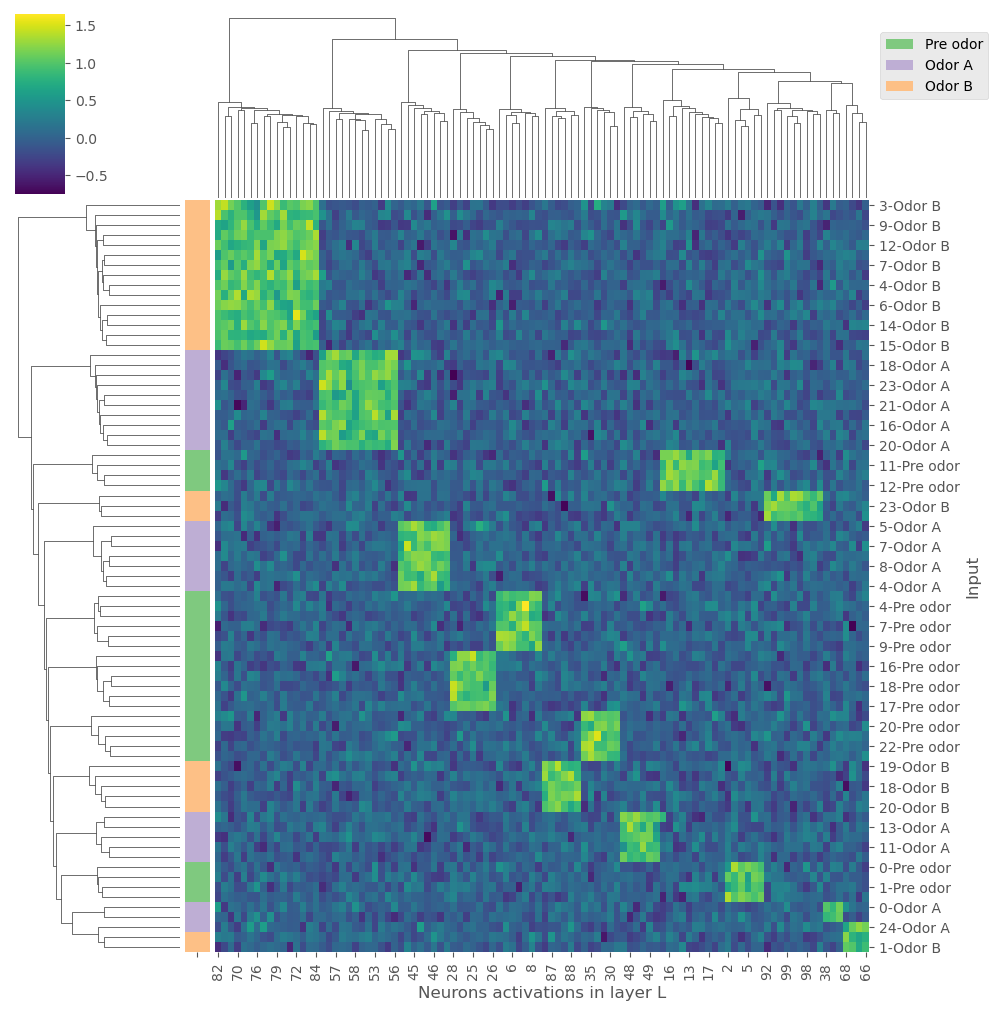

In [34]:
plot_activations(
    activations_layer_df=activations_layer_df,
    input_cond=input_cond,
    labels=CONTEXTS_LABELS,
    layer_inspected="L",
)

## Deviation from correct angle

In [35]:
angle_activations = torch.randn((128, 360), device=device)
angle_activations

tensor([[-1.5999e+00, -1.0495e+00, -1.0639e+00,  ..., -1.1066e+00,
         -5.4001e-01,  8.9598e-01],
        [-9.4766e-01,  1.5028e+00, -1.3149e+00,  ..., -1.6483e+00,
         -3.8317e-01, -3.1419e+00],
        [-3.1443e-02, -6.9175e-01,  1.7821e+00,  ..., -7.3831e-01,
          1.6893e+00, -1.0930e+00],
        ...,
        [-6.7770e-01, -2.1086e-03, -5.1716e-01,  ...,  1.1819e+00,
          5.8649e-01,  1.4460e+00],
        [-3.4813e-02,  6.5109e-01, -1.8251e-01,  ...,  1.8118e-01,
          7.9975e-01, -8.6162e-01],
        [ 1.6565e+00,  5.2443e-03,  1.0383e+00,  ..., -1.6318e+00,
         -7.7457e-01, -2.0568e+00]])

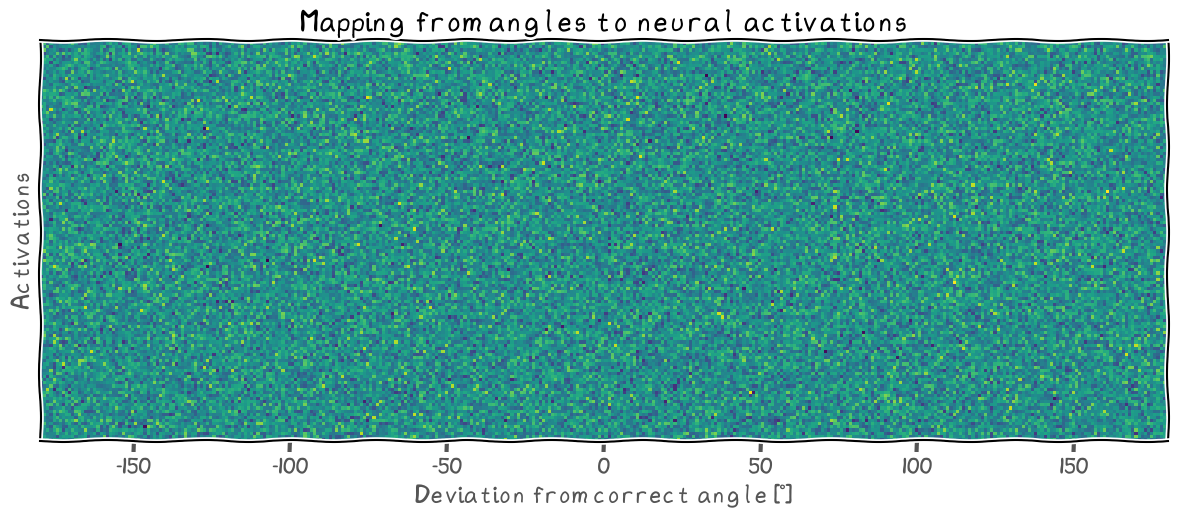

In [36]:
# plt.style.use("ggplot")
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(angle_activations, extent=[-180, 180, 0, 128])
    ax.set_title("Mapping from angles to neural activations")
    ax.set_xlabel("Deviation from correct angle [°]")  # , fontsize=30)
    ax.set_ylabel("Activations")  # , fontsize=30)
    ax.set_yticks([])
    fig.patch.set_alpha(0)
    fig.patch.set_facecolor("white")
    fig.tight_layout()
    plt.show()